In [1]:
import os, shutil
from keras import layers
from keras import models

In [2]:
def mk_dir_func(dir):
    try:
        os.mkdir(dir)
    except:
        pass

In [3]:
original_dataset_dir='./dogs-vs-cats/train'

base_dir = './cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

mk_dir_func(base_dir)
mk_dir_func(train_dir)
mk_dir_func(validation_dir)
mk_dir_func(test_dir)
mk_dir_func(train_cats_dir)
mk_dir_func(train_dogs_dir)
mk_dir_func(validation_cats_dir)
mk_dir_func(validation_dogs_dir)
mk_dir_func(test_cats_dir)
mk_dir_func(test_dogs_dir)

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for i in fnames:
    src = os.path.join(original_dataset_dir, i)
    dst = os.path.join(train_cats_dir, i)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for i in fnames:
    src = os.path.join(original_dataset_dir, i)
    dst = os.path.join(validation_cats_dir, i)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for i in fnames:
    src = os.path.join(original_dataset_dir, i)
    dst = os.path.join(test_cats_dir, i)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for i in fnames:
    src = os.path.join(original_dataset_dir, i)
    dst = os.path.join(train_dogs_dir, i)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for i in fnames:
    src = os.path.join(original_dataset_dir, i)
    dst = os.path.join(validation_dogs_dir, i)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for i in fnames:
    src = os.path.join(original_dataset_dir, i)
    dst = os.path.join(test_dogs_dir, i)
    shutil.copyfile(src,dst)

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu',
                       input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [6]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer= optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


<ipython-input-8-76dc69394845>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 19s 190ms/step - loss: 0.6894 - acc: 0.5375 - val_loss: 0.6722 - val_acc: 0.5880
Epoch 2/30
100/100 [==============================] - 20s 196ms/step - loss: 0.6563 - acc: 0.6215 - val_loss: 0.6730 - val_acc: 0.5790
Epoch 3/30
100/100 [==============================] - 19s 192ms/step - loss: 0.6118 - acc: 0.6680 - val_loss: 0.6281 - val_acc: 0.6220
Epoch 4/30
100/100 [==============================] - 19s 190ms/step - loss: 0.5668 - acc: 0.7115 - val_loss: 0.6136 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 19s 189ms/step - loss: 0.5321 - acc: 0.7385 - val_loss: 0.5766 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 19s 189ms/step - loss: 0.5109 - acc: 0.7475 - val_loss: 0.6955 - val_acc: 0.6200
Epoch 7/30
100/100 [==============================] - 19s 190ms/step - loss: 0.4884 - acc: 0.7540 - val_loss: 0.5613 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 19s 191ms/st

In [9]:
model.save('cats_and_dogs_small_1.h5')

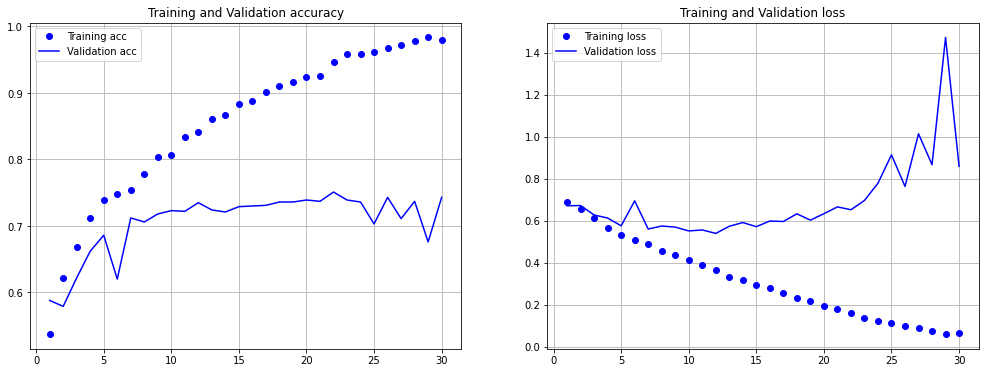

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.grid()
plt.legend()

In [11]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

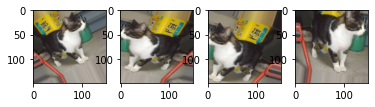

In [12]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for 
         fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.subplot(1,4,i+1)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate = 1e-4),
             metrics = ['acc'])


In [14]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(
    rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size= (150,150),
    batch_size= 20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 20s 192ms/step - loss: 0.6953 - acc: 0.5135 - val_loss: 0.6873 - val_acc: 0.5670
Epoch 2/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6858 - acc: 0.5500 - val_loss: 0.6779 - val_acc: 0.5180
Epoch 3/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6775 - acc: 0.5715 - val_loss: 0.6508 - val_acc: 0.6290
Epoch 4/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6623 - acc: 0.6020 - val_loss: 0.6374 - val_acc: 0.6360
Epoch 5/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6476 - acc: 0.6195 - val_loss: 0.6141 - val_acc: 0.6390
Epoch 6/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6426 - acc: 0.6160 - val_loss: 0.6259 - val_acc: 0.6190
Epoch 7/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6247 - acc: 0.6405 - val_loss: 0.5868 - val_acc: 0.6720
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 19s 192ms/step - loss: 0.4421 - acc: 0.7930 - val_loss: 0.4475 - val_acc: 0.7920
Epoch 62/100
100/100 [==============================] - 19s 193ms/step - loss: 0.4468 - acc: 0.7900 - val_loss: 0.4299 - val_acc: 0.8010
Epoch 63/100
100/100 [==============================] - 19s 191ms/step - loss: 0.4439 - acc: 0.7865 - val_loss: 0.4543 - val_acc: 0.7860
Epoch 64/100
100/100 [==============================] - 19s 193ms/step - loss: 0.4445 - acc: 0.8010 - val_loss: 0.4529 - val_acc: 0.7790
Epoch 65/100
100/100 [==============================] - 19s 191ms/step - loss: 0.4545 - acc: 0.7840 - val_loss: 0.4862 - val_acc: 0.7900
Epoch 66/100
100/100 [==============================] - 19s 191ms/step - loss: 0.4308 - acc: 0.8010 - val_loss: 0.4461 - val_acc: 0.7970
Epoch 67/100
100/100 [==============================] - 19s 192ms/step - loss: 0.4308 - acc: 0.8080 - val_loss: 0.4418 - val_acc: 0.7970
Epoch 68/100
100/100 [===================

In [16]:
model.save('cats_and_dogs_small_2.h5')

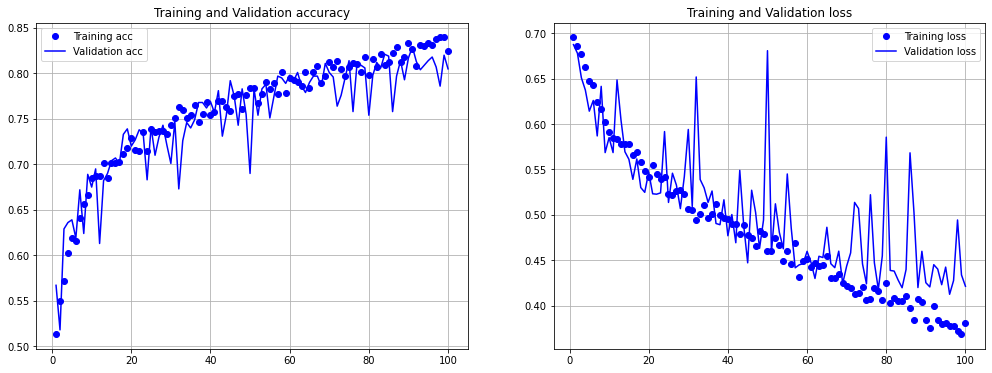

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.grid()
plt.legend()